# 1. Import Libraries and Load Dataset

In [1]:
from mizani.formatters import percent_format
from plotnine import *

# Importing librares 
import os  # to provide a way to use operating system-dependent functionalities. It allows you to interact with the underlying operating system, such as reading or writing files, navigating directories, etc
import sys  # to provide access to some variables used or maintained by the interpreter and functions that interact with the interpreter. It allows you to manipulate the Python runtime environment
import warnings  # to provide a way to handle warnings issued by Python or external libraries. It allows you to control the display and handling of warning messages
import numpy as np  # to provide support for large, multi-dimensional arrays and matrices, along with a wide range of mathematical functions to operate on these arrays efficiently
import pandas as pd  # to provide high-performance data structures like DataFrames and Series, along with a wide range of functions to manipulate, clean, and analyze structured data
import matplotlib.pyplot as plt  # to provide a wide variety of functions to create different types of plots and visualizations, allowing you to customize the appearance of your plots extensively
import seaborn as sns  # to provide a high-level interface for creating attractive and informative statistical graphics, making it easier to explore and understand data visually
warnings.filterwarnings("ignore")  # to ensure that warning messages are not displayed during the execution of your code


In [2]:
import warnings

warnings.filterwarnings("ignore")


In [3]:
# Import the prewritten helper functions
from py_helper_functions import *

In [4]:
# Import data
df = pd.read_csv("wms_da_textbook.csv")
df

,firmid,wave,cty,country,sic,management,operations,monitor,target,people,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,us,United States,38.0,3.500000,3.0,3.6,3.60,3.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,us,United States,38.0,3.166667,5.0,3.8,2.60,2.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,us,United States,38.0,3.000000,2.0,2.8,3.60,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,us,United States,28.0,4.666667,4.5,4.8,4.40,4.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,us,United States,28.0,4.444445,4.5,4.6,4.40,4.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14272,10278,2006,us,United States,35.0,2.111111,1.0,1.6,2.40,2.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14273,10279,2008,us,United States,28.0,3.666667,3.5,4.0,4.20,3.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14274,10280,2014,us,United States,20.0,3.611111,3.0,4.4,3.40,3.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14275,10281,2005,us,United States,34.0,3.277778,4.0,4.2,3.40,2.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(14277, 245)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Columns: 245 entries, firmid to aa_205
dtypes: float64(238), int64(2), object(5)
memory usage: 26.7+ MB


# 2. Finding numerical variables and feature engineering for numerical variables

In [7]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 240 numerical variables

The numerical variables are : ['firmid', 'wave', 'sic', 'management', 'operations', 'monitor', 'target', 'people', 'lean1', 'lean2', 'perf1', 'perf2', 'perf3', 'perf4', 'perf5', 'perf6', 'perf7', 'perf8', 'perf9', 'perf10', 'talent1', 'talent2', 'talent3', 'talent4', 'talent5', 'talent6', 'emp_firm', 'firmage', 'mne_yn', 'export', 'degree_m', 'degree_nm', 'degree_t', 'i_seniority', 'reliability', 'aa_1', 'aa_2', 'aa_3', 'aa_4', 'aa_5', 'aa_6', 'aa_7', 'aa_8', 'aa_9', 'aa_10', 'aa_11', 'aa_12', 'aa_13', 'aa_14', 'aa_15', 'aa_16', 'aa_17', 'aa_18', 'aa_19', 'aa_20', 'aa_21', 'aa_22', 'aa_23', 'aa_24', 'aa_25', 'aa_26', 'aa_27', 'aa_28', 'aa_29', 'aa_30', 'aa_31', 'aa_32', 'aa_33', 'aa_34', 'aa_35', 'aa_36', 'aa_37', 'aa_38', 'aa_39', 'aa_40', 'aa_41', 'aa_42', 'aa_43', 'aa_44', 'aa_45', 'aa_46', 'aa_47', 'aa_48', 'aa_49', 'aa_50', 'aa_51', 'aa_52', 'aa_53', 'aa_54', 'aa_55', 'aa_56', 'aa_57', 'aa_58', 'aa_59', 'aa_60', 'aa_61', 'aa_62', 'aa_63', 'aa_64'

In [8]:
# view the numerical variables
df[numerical].head()

,firmid,wave,sic,management,operations,monitor,target,people,lean1,lean2,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,38.0,3.500000,3.0,3.6,3.6,3.500000,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,38.0,3.166667,5.0,3.8,2.6,2.500000,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,38.0,3.000000,2.0,2.8,3.6,3.000000,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,28.0,4.666667,4.5,4.8,4.4,4.833333,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,28.0,4.444445,4.5,4.6,4.4,4.333333,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
df_num = df[numerical]
df_num

,firmid,wave,sic,management,operations,monitor,target,people,lean1,lean2,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
0,1,2004,38.0,3.500000,3.0,3.6,3.60,3.500000,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2006,38.0,3.166667,5.0,3.8,2.60,2.500000,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,2010,38.0,3.000000,2.0,2.8,3.60,3.000000,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,2004,28.0,4.666667,4.5,4.8,4.40,4.833333,4.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,2004,28.0,4.444445,4.5,4.6,4.40,4.333333,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14272,10278,2006,35.0,2.111111,1.0,1.6,2.40,2.666667,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14273,10279,2008,28.0,3.666667,3.5,4.0,4.20,3.000000,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14274,10280,2014,20.0,3.611111,3.0,4.4,3.40,3.333333,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14275,10281,2005,34.0,3.277778,4.0,4.2,3.40,2.166667,4.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Columns: 240 entries, firmid to aa_205
dtypes: float64(238), int64(2)
memory usage: 26.1 MB


In [11]:
# See missing values using isnull
df_num.isnull().sum()

firmid          0
wave            0
sic           313
management      0
operations     16
             ... 
aa_201          1
aa_202          1
aa_203          1
aa_204          1
aa_205          1
Length: 240, dtype: int64

In [12]:
df.describe()

,firmid,wave,sic,management,operations,monitor,target,people,lean1,lean2,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
count,14277.000000,14277.000000,13964.000000,14277.000000,14261.000000,14277.000000,14276.000000,14275.000000,14258.000000,14063.000000,...,14276.000000,14276.000000,14276.000000,14276.000000,14276.000000,14276.000000,14276.000000,14276.000000,14276.000000,14276.000000
mean,5145.027527,2009.199832,29.769837,2.919203,2.845505,3.208977,2.850856,2.758090,2.794571,2.902901,...,0.005324,0.004063,0.001751,0.008126,0.007145,0.004203,0.003713,0.003152,0.000070,0.000210
std,2937.740288,3.158298,5.927057,0.670948,1.056202,0.822338,0.788232,0.652436,1.115476,1.140801,...,0.072771,0.063612,0.041812,0.089778,0.084228,0.064695,0.060819,0.056057,0.008369,0.014495
min,1.000000,2004.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2672.000000,2006.000000,25.000000,2.444444,2.000000,2.600000,2.400000,2.333333,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5163.000000,2009.000000,30.000000,2.944444,3.000000,3.200000,2.800000,2.666667,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7671.000000,2013.000000,35.000000,3.388889,3.500000,3.800000,3.400000,3.166667,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10282.000000,2015.000000,39.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# Impute missing values using mean
df_num_imputed = df_num.fillna(df_num.mean())
df_num_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14277 entries, 0 to 14276
Columns: 240 entries, firmid to aa_205
dtypes: float64(238), int64(2)
memory usage: 26.1 MB


In [14]:
df_num_imputed.describe()

,firmid,wave,sic,management,operations,monitor,target,people,lean1,lean2,...,aa_196,aa_197,aa_198,aa_199,aa_200,aa_201,aa_202,aa_203,aa_204,aa_205
count,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000,...,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000,14277.000000
mean,5145.027527,2009.199832,29.769837,2.919203,2.845505,3.208977,2.850856,2.758090,2.794571,2.902901,...,0.005324,0.004063,0.001751,0.008126,0.007145,0.004203,0.003713,0.003152,0.000070,0.000210
std,2937.740288,3.158298,5.861722,0.670948,1.055610,0.822338,0.788205,0.652390,1.114734,1.132218,...,0.072769,0.063610,0.041811,0.089775,0.084225,0.064693,0.060817,0.056055,0.008369,0.014495
min,1.000000,2004.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2672.000000,2006.000000,25.000000,2.444444,2.000000,2.600000,2.400000,2.333333,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5163.000000,2009.000000,30.000000,2.944444,3.000000,3.200000,2.800000,2.666667,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7671.000000,2013.000000,35.000000,3.388889,3.500000,3.800000,3.400000,3.166667,4.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10282.000000,2015.000000,39.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


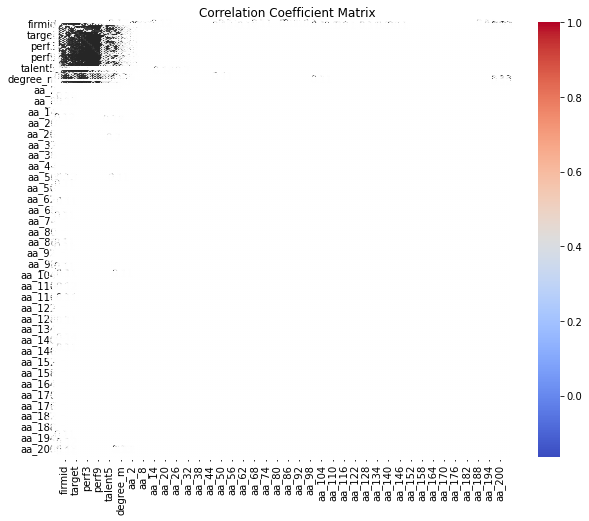

In [15]:
# Correlation in numerial data
correlation_matrix = df_num_imputed.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Set plot title
plt.title('Correlation Coefficient Matrix')

# Display the plot
plt.show()


In [16]:
# Checking subcategories for numerical variables to see if some integer valued variables are actually categorical
for column in df_num:
    num_categories = df_num_imputed[column].nunique()
    print(f"Number of categories in {column}: {num_categories}")

Number of categories in firmid: 10282
Number of categories in wave: 11
Number of categories in sic: 21
Number of categories in management: 211
Number of categories in operations: 13
Number of categories in monitor: 43
Number of categories in target: 44
Number of categories in people: 54
Number of categories in lean1: 8
Number of categories in lean2: 7
Number of categories in perf1: 8
Number of categories in perf2: 8
Number of categories in perf3: 8
Number of categories in perf4: 7
Number of categories in perf5: 8
Number of categories in perf6: 7
Number of categories in perf7: 8
Number of categories in perf8: 7
Number of categories in perf9: 8
Number of categories in perf10: 8
Number of categories in talent1: 9
Number of categories in talent2: 9
Number of categories in talent3: 8
Number of categories in talent4: 8
Number of categories in talent5: 8
Number of categories in talent6: 7
Number of categories in emp_firm: 972
Number of categories in firmage: 248
Number of categories in mne_yn

# 3. Outliers in numerical variables

In [17]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit and transform the selected columns
scaled_data = scaler.fit_transform(df_num_imputed)

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_num_imputed.columns)

# Print the scaled data
print(df_scaled)


         firmid      wave       sic  management  operations  monitor  target  \
0      0.000000  0.000000  0.947368    0.625000       0.500     0.65  0.6500   
1      0.000000  0.181818  0.947368    0.541667       1.000     0.70  0.4000   
2      0.000000  0.545455  0.947368    0.500000       0.250     0.45  0.6500   
3      0.000097  0.000000  0.421053    0.916667       0.875     0.95  0.8500   
4      0.000097  0.000000  0.421053    0.861111       0.875     0.90  0.8500   
...         ...       ...       ...         ...         ...      ...     ...   
14272  0.999611  0.181818  0.789474    0.277778       0.000     0.15  0.3500   
14273  0.999708  0.363636  0.421053    0.666667       0.625     0.75  0.8000   
14274  0.999805  0.909091  0.000000    0.652778       0.500     0.85  0.6000   
14275  0.999903  0.090909  0.736842    0.569444       0.750     0.80  0.6000   
14276  1.000000  0.181818  0.736842    0.558824       0.000     0.70  0.8125   

         people  lean1  lean2  ...  aa_

In [18]:
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled)

# Access the principal components and explained variance ratio
principal_components = pca.components_
explained_variance_ratio = pca.explained_variance_ratio_

# Print the principal components and explained variance ratio
print("Principal Components:")
print(principal_components)
print("\nExplained Variance Ratio:")
print(explained_variance_ratio)


Principal Components:
[[ 2.16506104e-02 -3.60593938e-02  7.64056380e-02 ... -2.09284449e-03
  -1.15014071e-04  1.95705044e-04]
 [ 1.11325014e-01 -4.27605430e-01 -6.81642392e-02 ...  6.47205156e-03
   4.08148201e-05  2.35070188e-04]
 [ 3.15892971e-01  4.47114837e-01 -7.52667011e-01 ... -8.57330461e-03
   1.58363269e-04 -1.00960182e-03]
 ...
 [-2.96709105e-04  2.15443926e-01 -9.32908354e-05 ...  5.76353829e-02
  -9.09595714e-02  1.20796158e-01]
 [-3.82207022e-06  1.04157368e-04  4.28271489e-05 ...  5.96208641e-05
  -1.78219170e-04  2.00232579e-04]
 [ 2.67651974e-17 -5.46250096e-16 -2.47256890e-17 ... -6.98430296e-02
  -6.98430296e-02 -6.98430296e-02]]

Explained Variance Ratio:
[2.46756168e-01 4.16107460e-02 3.53998500e-02 3.27765949e-02
 2.94905980e-02 2.74478862e-02 2.25286838e-02 1.99603119e-02
 1.83204616e-02 1.66611845e-02 1.52355588e-02 1.50840373e-02
 1.42783120e-02 1.22230462e-02 1.21858694e-02 1.17372373e-02
 1.12119570e-02 1.05232910e-02 1.00839565e-02 1.00329597e-02
 9.4605999

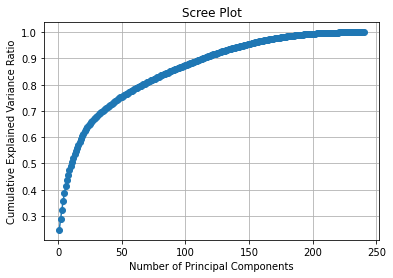

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()


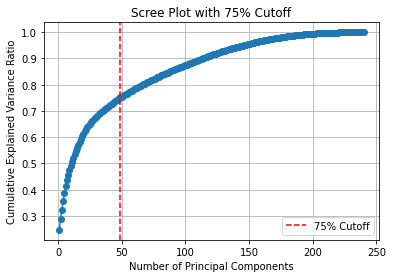

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 75% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.75) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='75% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 75% Cutoff')
plt.legend()
plt.grid(True)
plt.show()


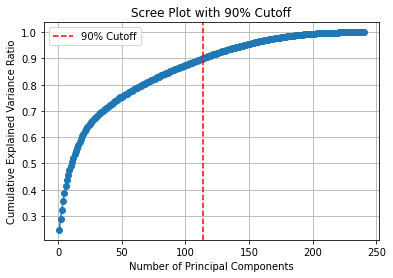

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 90% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.90) + 1

# Plot the scree plot
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.axvline(x=cutoff_index, color='r', linestyle='--', label='90% Cutoff')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot with 90% Cutoff')
plt.legend()
plt.grid(True)
plt.show()


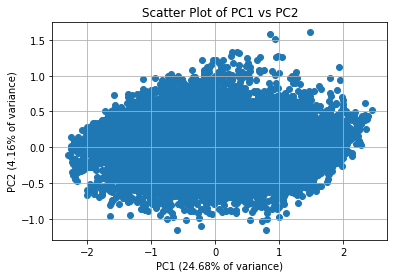

In [22]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled)

# Create a scatter plot of PC1 and PC2
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 ({:.2f}% of variance)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('Scatter Plot of PC1 vs PC2')
plt.grid(True)
plt.show()


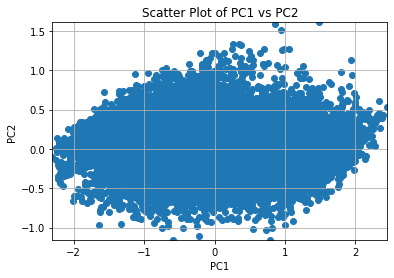

In [23]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled)

# Create a scatter plot of PC1 and PC2
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of PC1 vs PC2')
plt.xlim(min(principal_components[:, 0]), max(principal_components[:, 0]))
plt.ylim(min(principal_components[:, 1]), max(principal_components[:, 1]))
plt.grid(True)
plt.show()


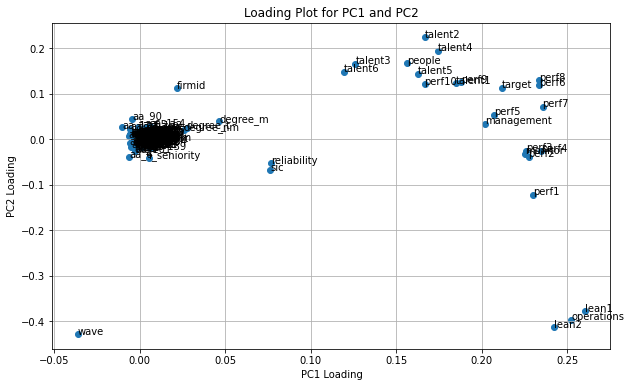

In [24]:
import matplotlib.pyplot as plt

# Create a PCA object
pca = PCA(n_components=2)  # Set the number of components to 2 for PC1 and PC2

# Fit the PCA model to the scaled data and transform it
principal_components = pca.fit_transform(df_scaled)

# Get the principal component loadings
loadings = pca.components_.T

# Create a loading plot for PC1 and PC2
plt.figure(figsize=(10, 6))
plt.scatter(loadings[:, 0], loadings[:, 1])
plt.xlabel('PC1 Loading')
plt.ylabel('PC2 Loading')
plt.title('Loading Plot for PC1 and PC2')
plt.grid(True)

# Add labels for each feature
for i, feature in enumerate(df_scaled.columns):
    plt.annotate(feature, (loadings[i, 0], loadings[i, 1]))

plt.show()


In [ ]:
import seaborn as sns
import numpy as np

# Create a PCA object
pca = PCA()

# Fit the PCA model to the scaled data
pca.fit(df_scaled)

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the index of the component that crosses the 75% cutoff
cutoff_index = np.argmax(cumulative_variance_ratio >= 0.75) + 1

# Get the principal components up to the cutoff index
principal_components_cutoff = pca.components_[:cutoff_index]

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(principal_components_cutoff.T)

# Create a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", square=True)
plt.title('Correlation Heatmap of Principal Components (75% Cutoff)')
plt.show()
